# Wright-Fisher modell

$ P_{i,j} = Pr[X(t) = j \mid X(t-1) = i] = \dbinom{N}{j} \left( \frac{i}{N} \right)^j \left( \frac{N-i}{N} \right)^{N-j} $

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(2024)
sns.color_palette("viridis", as_cmap=True)

T = 100
N = 100 # N population in 10, 100, 1000
X_0 = N/2

In [ ]:
def simulation_wright_fisher(N, T, X_0, samples=100):

    # allocate memory
    state = np.zeros((samples, T))
    state[:, 0] = X_0
    for i in range(samples):
        for t in range(1, T):
            p = state[i, t-1] / N
            state[i, t] = np.random.binomial(N, p, size=None)
            # s = np.random.binomial(n, p, size=1000)
            # result of flipping a coin 10 times, tested 1000 times.

    return(state)


In [ ]:
sim = simulation_wright_fisher(N, T, X_0=N/2, samples=100)
sim[:5, :10]

array([[50., 53., 50., 44., 36., 40., 39., 43., 42., 43.],
       [50., 58., 60., 59., 62., 60., 54., 43., 46., 47.],
       [50., 50., 61., 60., 50., 49., 48., 55., 49., 38.],
       [50., 44., 48., 48., 53., 54., 51., 56., 61., 54.],
       [50., 49., 49., 57., 55., 46., 44., 31., 32., 40.]])

In [ ]:
means = np.mean(sim, axis=0); sd = np.sqrt(np.var(sim, axis=0, ddof=1))
pd.DataFrame({"m": means, "s": sd}).describe().T

,count,mean,std,min,25%,50%,75%,max
m,100.0,47.162500,0.930496,44.93,46.857500,47.190000,47.682500,50.000000
s,100.0,29.355274,9.289719,0.00,24.745791,31.526534,37.551011,40.223983


<Axes: >

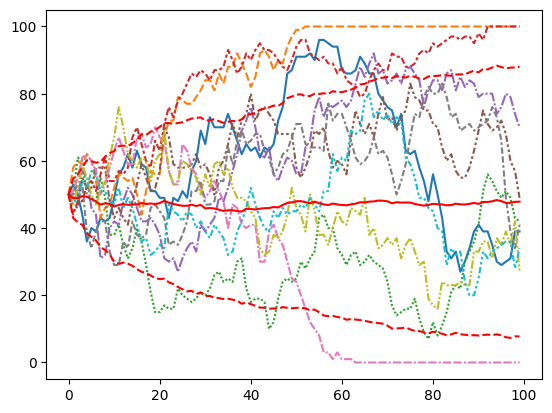

In [ ]:
# Plotting
sns.lineplot(sim[:10, :].T, legend=False, dashes=True) #linestyle=["dotted" for i in range(10)])
sns.lineplot(means.T, color="red", dashes=False, linestyle='solid')
sns.lineplot(means.T+sd.T, color="red", linestyle="dashed")
sns.lineplot(means.T-sd.T, color="red", linestyle="dashed")

## Questions?

1. What happens if we vary N?
2. What happens if we vary T?
3. What happens if we vary X_0?
4. What's missing in the model?